<a href="https://colab.research.google.com/github/Amit32624/predicting_solubility/blob/main/predicting_solubility_using_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be reproducing a research article (by John S. Delaney$^1$) by applying Linear Regression to predict the solubility of molecules (i.e. solubility of drugs is an important physicochemical property in Drug discovery, design and development).

This idea for this notebook was inspired by the excellent blog post by Pat Walters$^2$ where he reproduced the linear regression model with similar degree of performance as that of Delaney. This example is also briefly described in the book Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More.$^3$

## 1.Installing libraries - pycaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.4 MB/s 
     |████████████████████████████████| 86 kB 3.5 MB/s 
     |████████████████████████████████| 113 kB 59.3 MB/s 
     |████████████████████████████████| 1.7 MB 51.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 44 kB/s 
     |████████████████████████████████| 2.0 MB 60.4 MB/s 
     |████████████████████████████████| 6.8 MB 71.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 271 kB 57.0 MB/s 
     |████████████████████████████████| 1.3 MB 60.4 MB/s 
     |████████████████████████████████| 167 kB 70.7 MB/s 
     |████████████████████████████████| 261 kB 53.9 MB/s 
     |████████████████████████████████| 3.1 MB 43.9 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |███████████████████

In [ ]:
from pycaret.regression import *

## 2.Read in dataset

In [ ]:
import pandas as pd

In [ ]:
!wget https://github.com/Amit32624/predicting_solubility/blob/main/delaney_solubility_with_descriptors.csv

--2021-11-09 09:42:14--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57370 (56K) [text/plain]
Saving to: ‘delaney_solubility_with_descriptors.csv’

delaney_solubility_ 100%[===================>]  56.03K  --.-KB/s    in 0.01s   

2021-11-09 09:42:14 (5.13 MB/s) - ‘delaney_solubility_with_descriptors.csv’ saved [57370/57370]



In [ ]:
delaney_with_descriptors_url = https://github.com/Amit32624/predicting_solubility/blob/main/delaney_solubility_with_descriptors.csv'
dataset = pd.read_csv(delaney_with_descriptors_url)
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## 3.Model Building


## 3.1Model setup

In [ ]:
from pycaret.regression import *

In [ ]:
model = setup(data = dataset,target='logS',train_size=0.8,silent=True)

,Description,Value
0,session_id,815
1,Target,logS
2,Original Data,"(1144, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(915, 4)"


## 3.2 Model Comparison

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5160,0.5310,0.7223,0.8729,0.2036,0.6603,0.459
rf,Random Forest Regressor,0.5311,0.5623,0.7435,0.8646,0.2104,0.6835,0.513
lightgbm,Light Gradient Boosting Machine,0.5528,0.5687,0.7495,0.8632,0.2144,0.6900,0.092
gbr,Gradient Boosting Regressor,0.5900,0.6216,0.7831,0.8496,0.2308,0.7078,0.087
ada,AdaBoost Regressor,0.6927,0.7875,0.8848,0.8110,0.2438,0.8577,0.092
dt,Decision Tree Regressor,0.6798,0.9666,0.9782,0.7695,0.2631,0.7303,0.016
lr,Linear Regression,0.7777,1.0292,1.0094,0.7528,0.2917,0.9543,0.290
ridge,Ridge Regression,0.7778,1.0291,1.0094,0.7528,0.2916,0.9542,0.013
lar,Least Angle Regression,0.7777,1.0292,1.0094,0.7528,0.2917,0.9543,0.016
br,Bayesian Ridge,0.7783,1.0291,1.0094,0.7528,0.2914,0.9542,0.015


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=815, verbose=0, warm_start=False)

## 3.3 Model Creation

In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4798,0.4390,0.6626,0.8938,0.1689,0.4952
1,0.4870,0.4867,0.6976,0.8665,0.2551,2.5258
2,0.5624,0.5851,0.7649,0.8609,0.2248,0.2492
3,0.5914,0.8266,0.9092,0.7891,0.2192,0.4157
4,0.4534,0.4206,0.6485,0.8908,0.1995,0.6079
5,0.5886,0.6285,0.7928,0.8739,0.1961,0.3078
6,0.4781,0.3996,0.6322,0.9191,0.1668,0.2929
7,0.5875,0.7250,0.8515,0.8385,0.1905,0.2397
8,0.4630,0.3911,0.6254,0.8893,0.2243,0.5003
9,0.4682,0.4078,0.6386,0.9069,0.1905,0.9687


## 3.4 Model Tuning

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal.

In [ ]:
# tuned_et = tune_model('et',n_iter=60,optimize='mae')
tuned_et = tune_model(et, n_iter = 50, optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5015,0.4520,0.6723,0.8907,0.1790,0.5304
1,0.5618,0.5690,0.7543,0.8439,0.2757,2.5403
2,0.6104,0.6019,0.7758,0.8569,0.2235,0.2951
3,0.6267,0.8774,0.9367,0.7762,0.2319,0.4333
4,0.5744,0.5347,0.7312,0.8611,0.2240,0.6693
5,0.5999,0.5941,0.7708,0.8809,0.2001,0.3177
6,0.5323,0.4359,0.6603,0.9117,0.1987,0.3985
7,0.6388,0.8031,0.8961,0.8212,0.1934,0.3146
8,0.5705,0.5415,0.7358,0.8467,0.2639,0.6075
9,0.5989,0.5079,0.7127,0.8840,0.2254,1.3500


In [ ]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=9, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0001,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=20, n_jobs=-1, oob_score=False,
                    random_state=815, verbose=0, warm_start=False)


## 4.Model Analysis

Residuals Plot

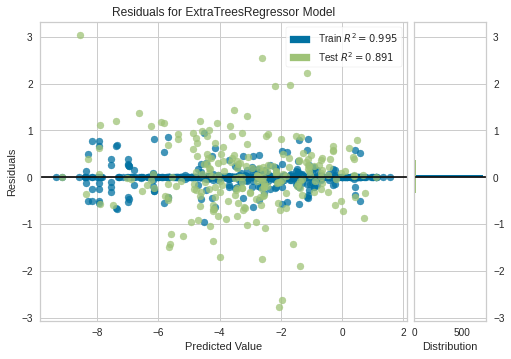

In [ ]:
plot_model(et,'residuals')


Prediction Error Plot

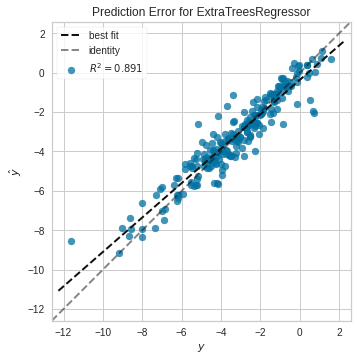

In [ ]:
plot_model(et,'error')

Cooks Distance Plot - To detect outliers


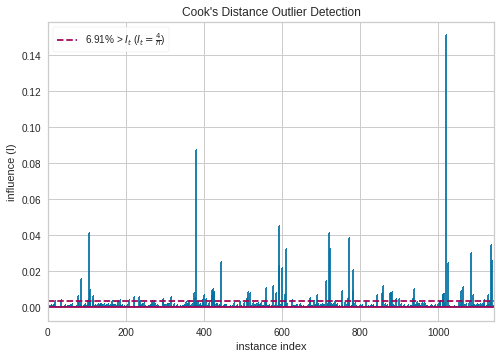

In [ ]:
plot_model(et,'cooks')

Learning curve analysis

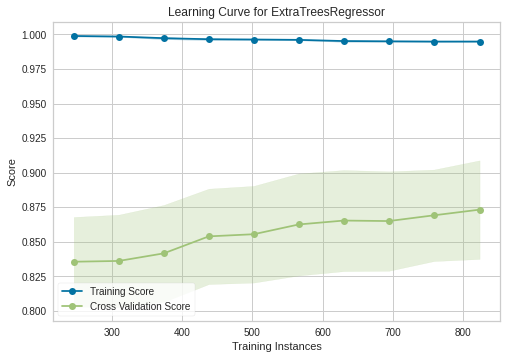

In [ ]:
plot_model(et,'learning')

Feature Importance

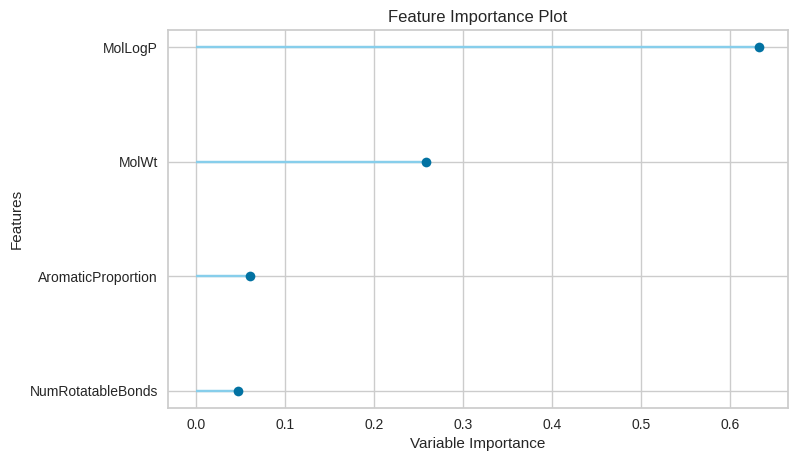

In [ ]:
plot_model(et, 'feature')

Model Hyperparameter

The hyperparameter of the learning model is displayed using the parameter argument in inside the plot_model() function.

In [ ]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1



Here, the hyperparameter of the tuned model is displayed below

In [ ]:
plot_model(tuned_et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mae
max_depth,9
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0001
min_impurity_split,None
min_samples_leaf,2


Show all plots

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 4. Testing

We will now apply the trained model (built with 80% subset) to evaluate on the so-called "hold-out" testing set (the 20% subset) that serves as the unseen data.

In [ ]:
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5141,0.5377,0.7333,0.8908,0.1888,0.4256


In [ ]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Label
0,1.8050,116.204002,3.0,0.000000,-1.52,-1.189667
1,3.4934,324.380005,5.0,0.500000,-3.73,-4.153970
2,2.4237,148.205002,3.0,0.545455,-2.92,-2.731253
3,1.7397,130.186996,4.0,0.000000,-1.89,-1.956667
4,2.0456,128.557999,0.0,0.750000,-1.06,-0.700000


**Reference**


1.   John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x).**J. Chem. Inf. Comput. Sci.** 2004, 44, 3, 1000-1005.
2.   Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). **Practical Cheminformatics Blog**
3.   Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life S ciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More,](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/) **O'Reilly**, 2019.
4.  [Supplementary file ](https://pubs.acs.org/doi/10.1021/ci034243x)from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.








